In [ ]:
import numpy as np # linear algebra                                 
import pandas as pd # data processing
from sklearn.model_selection import train_test_split                               
import seaborn as sns
import matplotlib.pyplot as plt         
import matplotlib.patches as mpatches
import time
%matplotlib inline 

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

In [ ]:
import pandas as pd
import numpy as np
#df = pd.read_csv("/content/drive/MyDrive/CourseWork 4.2/PatternProject/Twitter_Data.csv")
#df = pd.read_csv("/content/drive/MyDrive/Pattern Lab Project/Unstructured Dataset/Twitter_Data.csv")
#df = pd.read_csv("/content/drive/MyDrive/Pattern Lab Project/Unstructured Dataset/Twitter_Data.csv")
df = pd.read_csv("H:/Github/Thesis-/academic/faiza/Twitter_Data.csv")
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [ ]:
# Any missing data?
df.isnull().sum()

clean_text    4
category      7
dtype: int64

In [ ]:
# drop missing rows
df.dropna(axis=0, inplace=True)

In [ ]:
# dimensionality of the data
df.shape

(162969, 2)

In [ ]:
# Map tweet categories
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
# Output first five rows
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


### Data Visualization

<AxesSubplot:xlabel='category'>

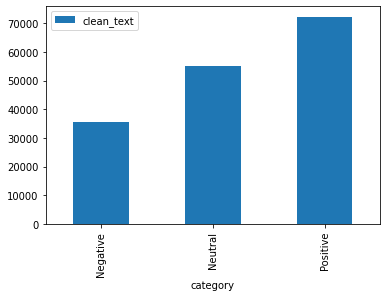

In [ ]:
# The distribution of sentiments
df.groupby('category').count().plot(kind='bar')

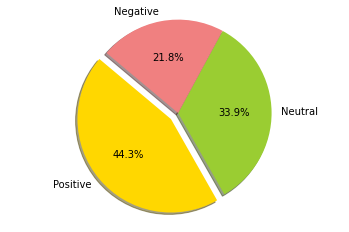

In [ ]:
labels = 'Positive', 'Neutral', 'Negative'
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice
# Plot
plt.pie(df['category'].value_counts(), explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def wolrdcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.category==category]['clean_text']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()

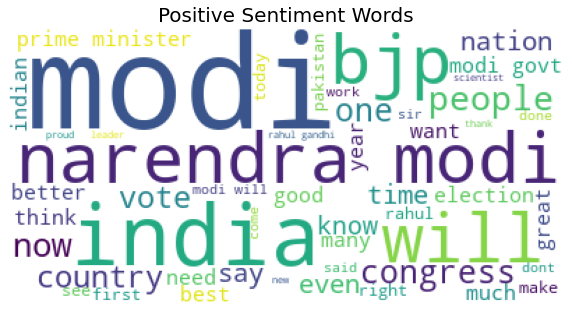

In [ ]:
# Positive tweet words
wolrdcount_gen(df, 'Positive')

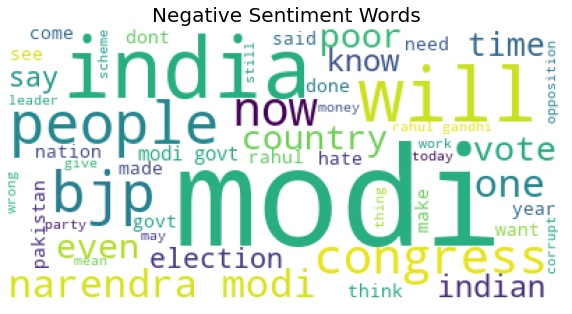

In [ ]:
# Negative tweet words
wolrdcount_gen(df, 'Negative')

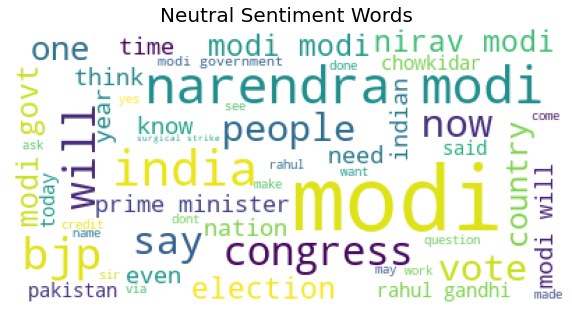

In [ ]:
# Negative tweet words
wolrdcount_gen(df, 'Neutral')

### Data Preprocessing 

In [ ]:
import re    # RegEx for removing non-letter characters

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *


def tweet_to_words(tweet):
    ''' Convert tweet text into a sequence of words '''
    
    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list
    return words

print("\nOriginal tweet ->", df['clean_text'][0])
print("\nProcessed tweet ->", tweet_to_words(df['clean_text'][0]))


Original tweet -> when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples

Processed tweet -> ['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#import tensorflow as tf
#with tf.device('/device:GPU:0'):# Apply data processing to each tweet
X = list(map(tweet_to_words, df['clean_text']))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
le = LabelEncoder()
Y = le.fit_transform(df['category'])

In [ ]:
print(X[0])
print(Y[0])
print("X")


['modi', 'promis', 'minimum', 'govern', 'maximum', 'govern', 'expect', 'begin', 'difficult', 'job', 'reform', 'state', 'take', 'year', 'get', 'justic', 'state', 'busi', 'exit', 'psu', 'templ']
0
X


### Train and test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print('Number of tweets in the total set : {}'.format(len(X)))
print('Number of tweets in the training set : {}'.format(len(X_train)))
print('Number of tweets in the testing set : {}'.format(len(X_test)))


Number of tweets in the total set : 162969
Number of tweets in the training set : 130375
Number of tweets in the testing set : 32594


### Bag of words (BOW) feature extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
#https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
vocabulary_size = 5000

# Tweets have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()

In [ ]:
#import sklearn.preprocessing as pr

# Normalize BoW features in training and test set
#X_train = pr.normalize(X_train, axis=1)
#X_test  = pr.normalize(X_test, axis=1)

In [ ]:
# print first 200 words/tokens
print(count_vector.get_feature_names()[0:200])

['100', '1000', '10000', '108', '10th', '10yr', '111', '1145', '1200', '12000', '125', '12k', '130', '140', '14000', '150', '1500', '1500000', '1520', '157200000', '15l', '15lac', '15lakh', '180', '1947', '1958', '1962', '1969', '1971', '1974', '1980', '1984', '1998', '1st', '200', '2000', '2002', '2004', '2007', '2008', '2009', '2010', '2011', '2012', '201213', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2022', '2024', '2025', '2029', '21st', '23rd', '247', '24x7', '250', '2611', '26th', '272', '27th', '280319', '282', '29th', '2cr', '2day', '2nd', '300', '3000', '30000', '300km', '31st', '350', '35a', '370', '3rd', '400', '4000', '456', '4th', '500', '5000', '50000', '5th', '5year', '5yr', '600', '6000', '6th', '70yr', '72000', '7200000', '72k', '7th', '8020', '9000', 'aadhaar', 'aadhar', 'aadmi', 'aag', 'aaj', 'aalo', 'aam', 'aan', 'aap', 'aapk', 'aapki', 'aapko', 'aapn', 'aay', 'aaya', 'aayega', 'aayog', 'abandon', 'abdul', 'abdullah', 'abe', 'abhi', 'abhinanda

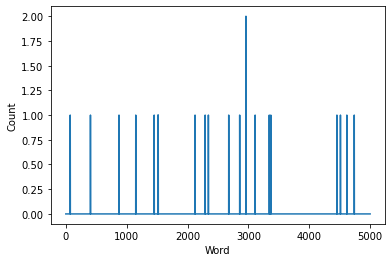

In [ ]:
# Plot the BoW feature vector
plt.plot(X_train[2,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

## Machine Learning Models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from time import time
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


def train_predict(classifier, X_train, y_train, X_test, y_test): 

    
    results = {}

    clf = classifier.fit(X_train, y_train)

    y_pred = clf.predict(X_test)        
        
    results['accuracy'] = accuracy_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred, average='weighted')
    
    results['recall'] = recall_score(y_test, y_pred, average='weighted')        

    results['f1_score'] = f1_score(y_test, y_pred, average='weighted')

    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    return results, y_pred

In [ ]:
#with tf.device('/device:GPU:0'):
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(random_state=1)
clf_C = LogisticRegression(solver='lbfgs', max_iter=1000)
clf_E = RandomForestClassifier(n_estimators=100)
clf_F = KNeighborsClassifier(n_neighbors=3)
clf_D = svm.SVC()

# For reducing training time
train_size = 40000
test_size = 10000

# Collect results
predictions = {}
results = {}
clf_list = [clf_A, clf_B, clf_C, clf_E, clf_F, clf_D] 



Training GaussianNB...


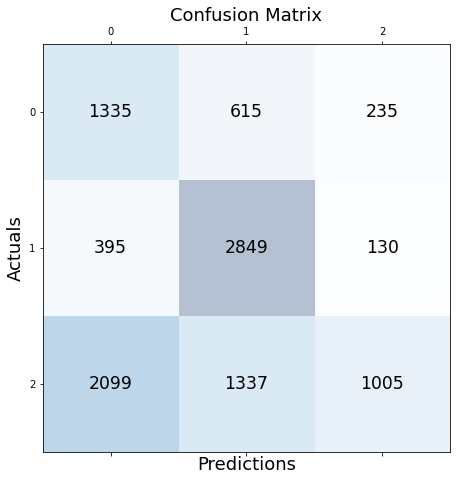

After executing --- 3.7489731311798096


In [ ]:
start = time.time()
clf_name = clf_list[0].__class__.__name__
print('Training {}...'.format(clf_name))
results[clf_name] = {}
results[clf_name],predictions[clf_name] = train_predict(clf_list[0], X_train[:train_size], y_train[:train_size],
                                                        X_test[:test_size], y_test[:test_size])
end = time.time()
print("After executing ---" , (end-start))

Training DecisionTreeClassifier...


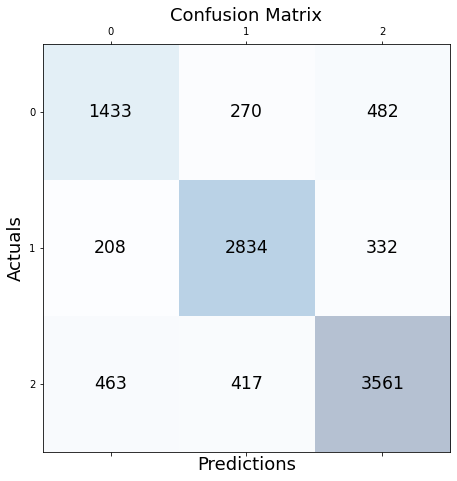

After executing --- 1112.6818284988403


In [ ]:
start = time.time()
clf_name = clf_list[1].__class__.__name__
print('Training {}...'.format(clf_name))
results[clf_name] = {}
results[clf_name],predictions[clf_name] = train_predict(clf_list[1], X_train[:train_size], y_train[:train_size],
                                                        X_test[:test_size], y_test[:test_size])
end = time.time()
print("After executing ---" , (end-start))

Training LogisticRegression...


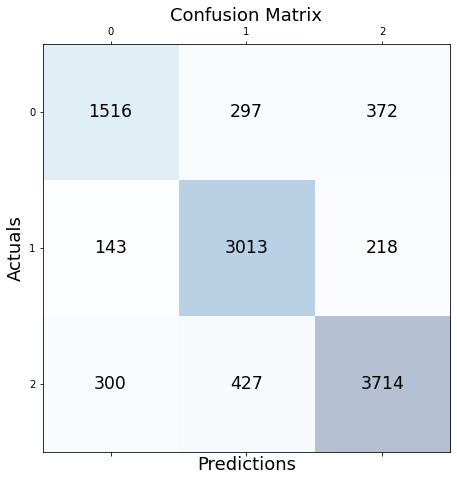

After executing --- 64.21166110038757


In [ ]:
start = time.time()
clf_name = clf_list[2].__class__.__name__
print('Training {}...'.format(clf_name))
results[clf_name] = {}
results[clf_name],predictions[clf_name] = train_predict(clf_list[2], X_train[:train_size], y_train[:train_size],
                                                        X_test[:test_size], y_test[:test_size])
end = time.time()
print("After executing ---" , (end-start))

Training RandomForestClassifier...


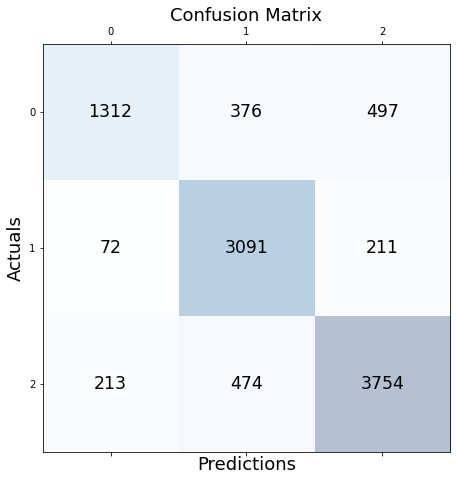

After executing --- 584.4227435588837


In [ ]:
start = time.time()
clf_name = clf_list[3].__class__.__name__
print('Training {}...'.format(clf_name))
results[clf_name] = {}
results[clf_name],predictions[clf_name] = train_predict(clf_list[3], X_train[:train_size], y_train[:train_size],
                                                        X_test[:test_size], y_test[:test_size])
end = time.time()
print("After executing ---" , (end-start))

Training KNeighborsClassifier...


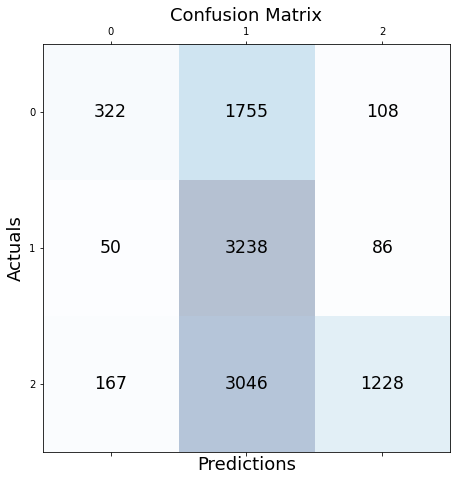

After executing --- 33.60369634628296


In [ ]:
start = time.time()
clf_name = clf_list[4].__class__.__name__
print('Training {}...'.format(clf_name))
results[clf_name] = {}
results[clf_name],predictions[clf_name] = train_predict(clf_list[4], X_train[:train_size], y_train[:train_size],
                                                        X_test[:test_size], y_test[:test_size])
end = time.time()
print("After executing ---" , (end-start))

Training SVC...


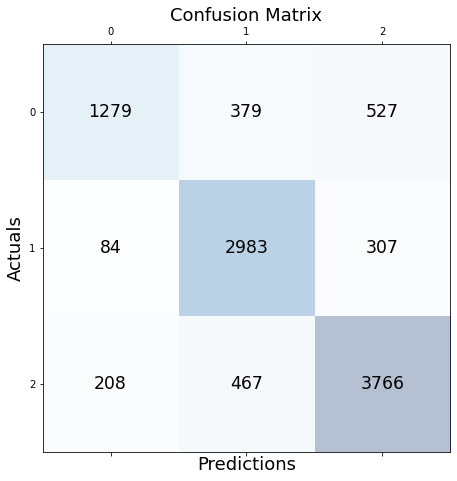

After executing --- 10763.297279834747


In [ ]:
start = time.time()
clf_name = clf_list[5].__class__.__name__
print('Training {}...'.format(clf_name))
results[clf_name] = {}
results[clf_name],predictions[clf_name] = train_predict(clf_list[5], X_train[:train_size], y_train[:train_size],
                                                        X_test[:test_size], y_test[:test_size])
end = time.time()
print("After executing ---" , (end-start))

                        accuracy  precision  recall  f1_score
GaussianNB                0.5189   0.602182  0.5189  0.485787
DecisionTreeClassifier    0.7828   0.781857  0.7828  0.782130
LogisticRegression        0.8243   0.824344  0.8243  0.823005
RandomForestClassifier    0.8157   0.817769  0.8157  0.811254
KNeighborsClassifier      0.4788   0.649945  0.4788  0.429138
SVC                       0.8028   0.804323  0.8028  0.798242


<AxesSubplot:>

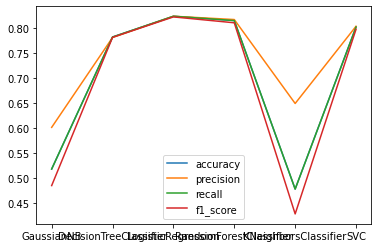

In [ ]:
# Dataframe from dict
#with tf.device('/device:GPU:0'):
results_df = pd.DataFrame.from_dict(results).transpose()
print(results_df)
#print(results_df.columns)
# quick visual check
results_df.plot()

## **ROC Curve**

In [ ]:
df.head(10)

,clean_text,category
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive
5,kiya tho refresh maarkefir comment karo,Neutral
6,surat women perform yagna seeks divine grace f...,Neutral
7,this comes from cabinet which has scholars lik...,Neutral
8,with upcoming election india saga going import...,Positive
9,gandhi was gay does modi,Positive


In [ ]:
# Map tweet categories
df['category'] = df['category'].map({'Negative':-1.0, 'Neutral':0.0, 'Positive':1.0})
# Output first five rows
df.head(10)

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
5,kiya tho refresh maarkefir comment karo,0.0
6,surat women perform yagna seeks divine grace f...,0.0
7,this comes from cabinet which has scholars lik...,0.0
8,with upcoming election india saga going import...,1.0
9,gandhi was gay does modi,1.0


In [ ]:
from sklearn.preprocessing import label_binarize

df[['Negative', 'Neutral', 'Positive']] = pd.DataFrame(label_binarize(df['category'], [-1, 0, 1]), index=df.index)

df.head(10)

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[-1, 0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


,clean_text,category,Negative,Neutral,Positive
0,when modi promised “minimum government maximum...,-1.0,1,0,0
1,talk all the nonsense and continue all the dra...,0.0,0,1,0
2,what did just say vote for modi welcome bjp t...,1.0,0,0,1
3,asking his supporters prefix chowkidar their n...,1.0,0,0,1
4,answer who among these the most powerful world...,1.0,0,0,1
5,kiya tho refresh maarkefir comment karo,0.0,0,1,0
6,surat women perform yagna seeks divine grace f...,0.0,0,1,0
7,this comes from cabinet which has scholars lik...,0.0,0,1,0
8,with upcoming election india saga going import...,1.0,0,0,1
9,gandhi was gay does modi,1.0,0,0,1


In [ ]:
df['Negative'].value_counts(dropna=False)


0    127460
1     35509
Name: Negative, dtype: int64

In [ ]:
df['Positive'].value_counts(dropna=False)

0    90720
1    72249
Name: Positive, dtype: int64

In [ ]:
df['Neutral'].value_counts(dropna=False)

0    107758
1     55211
Name: Neutral, dtype: int64

In [ ]:
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt


# This function is based off of this example: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
def plot_roc_curve(fpr, tpr, roc_auc,class_name):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.text(0.1, 1.0, class_name , fontsize=None,  color='red')
    plt.show()


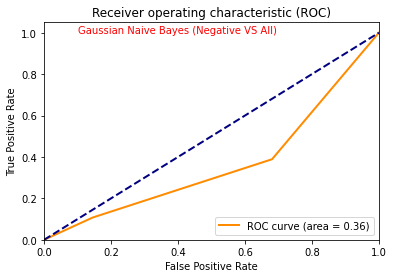

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['GaussianNB'], pos_label=0)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'Gaussian Naive Bayes (Negative VS All)')

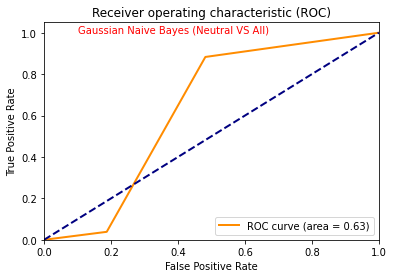

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['GaussianNB'], pos_label=1)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'Gaussian Naive Bayes (Neutral VS All)')

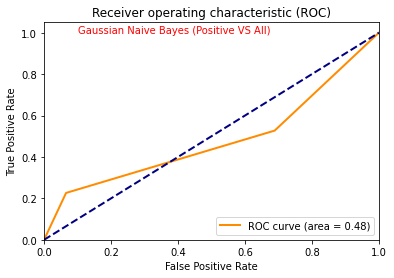

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['GaussianNB'], pos_label=2)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'Gaussian Naive Bayes (Positive VS All)')

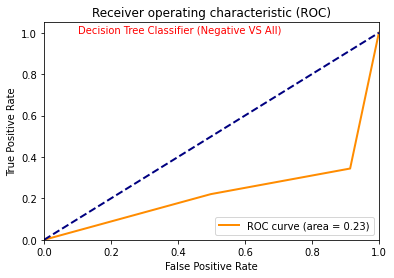

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['DecisionTreeClassifier'], pos_label=0)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'Decision Tree Classifier (Negative VS All)')

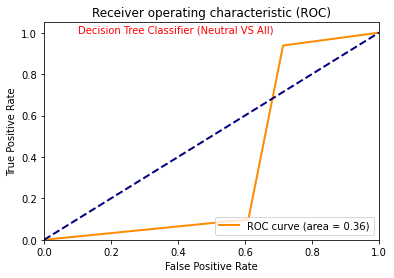

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['DecisionTreeClassifier'], pos_label=1)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'Decision Tree Classifier (Neutral VS All)')

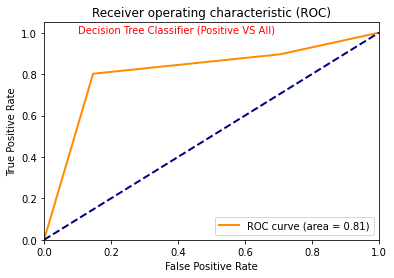

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['DecisionTreeClassifier'], pos_label=2)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'Decision Tree Classifier (Positive VS All)')

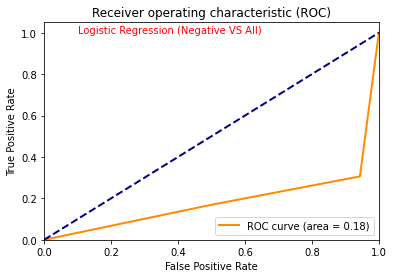

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['LogisticRegression'], pos_label=0)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'Logistic Regression (Negative VS All)')

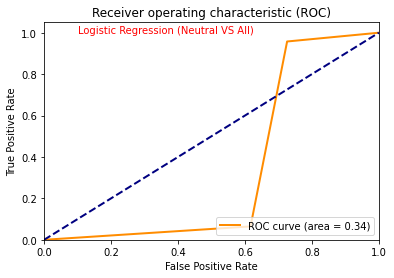

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['LogisticRegression'], pos_label=1)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'Logistic Regression (Neutral VS All)')

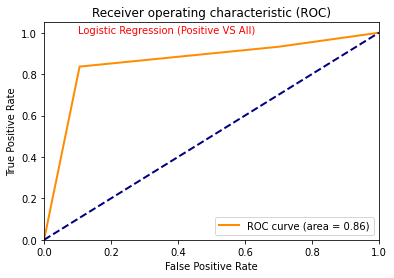

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['LogisticRegression'], pos_label=2)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'Logistic Regression (Positive VS All)')

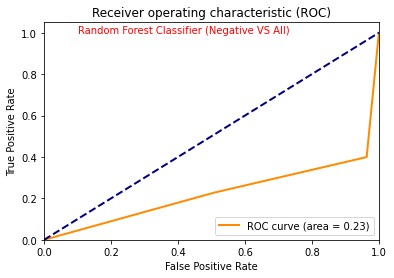

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['RandomForestClassifier'], pos_label=0)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'Random Forest Classifier (Negative VS All)')

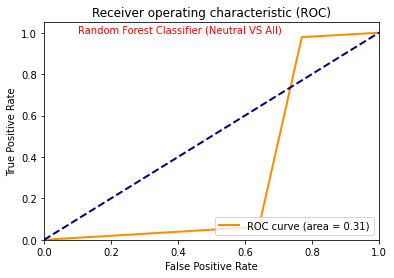

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['RandomForestClassifier'], pos_label=1)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'Random Forest Classifier (Neutral VS All)')

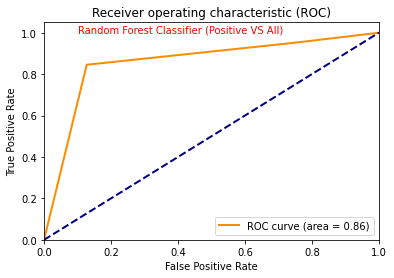

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['RandomForestClassifier'], pos_label=2)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'Random Forest Classifier (Positive VS All)')

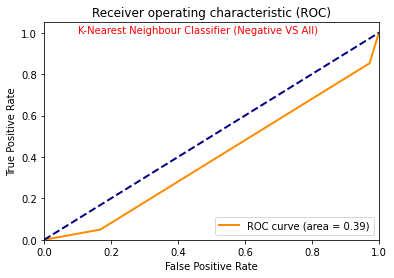

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['KNeighborsClassifier'], pos_label=0)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'K-Nearest Neighbour Classifier (Negative VS All)')

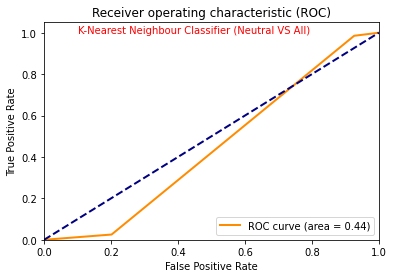

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['KNeighborsClassifier'], pos_label=1)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'K-Nearest Neighbour Classifier (Neutral VS All)')

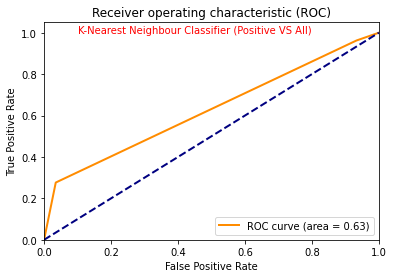

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['KNeighborsClassifier'], pos_label=2)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'K-Nearest Neighbour Classifier (Positive VS All)')

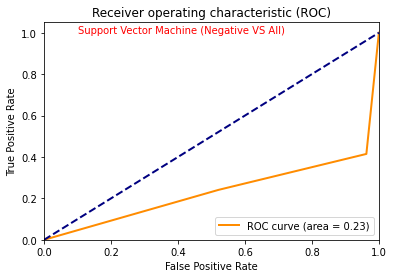

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['SVC'], pos_label=0)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'Support Vector Machine (Negative VS All)')

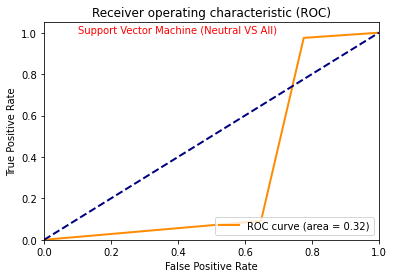

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['SVC'], pos_label=1)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'Support Vector Machine (Neutral VS All)')

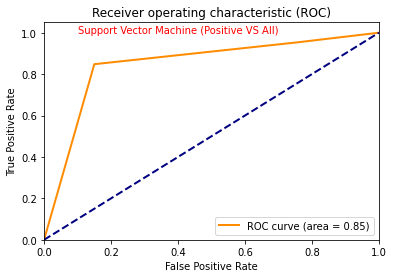

In [ ]:
neg_fpr, neg_tpr, neg_thresholds = roc_curve( y_test[:test_size],predictions['SVC'], pos_label=2)
neg_roc_auc = auc(neg_fpr, neg_tpr)
plot_roc_curve(neg_fpr, neg_tpr, neg_roc_auc,'Support Vector Machine (Positive VS All)')